In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("pima-indians-diabetes-1.data",names=colnames)
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
prima_df['outcome'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [95]:
prima_df['outcome'] = prima_df['outcome'].replace({0: 'Healthy', 1: 'Diabetic'})

In [96]:
prima_df['outcome'] = prima_df.outcome.astype('category')

In [97]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [160]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [161]:
Xtrain=np.array(xtrain)
Ytrain=np.array(ytrain)

In [162]:
Xtest=np.array(xtest)
Ytest=np.array(ytest)

In [163]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [164]:
ypred=model.predict(Xtest)


In [165]:
acc=metrics.accuracy_score(Ytest,ypred)
print(acc)

0.7229437229437229


In [166]:
cm=metrics.confusion_matrix(Ytest,ypred)
print(cm)

[[ 40  34]
 [ 30 127]]


In [167]:
cr=metrics.classification_report(Ytest,ypred)
print(cr)

              precision    recall  f1-score   support

    Diabetic       0.57      0.54      0.56        74
     Healthy       0.79      0.81      0.80       157

   micro avg       0.72      0.72      0.72       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.72      0.72      0.72       231



In [169]:

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = xtrain.columns))


           Imp
preg  0.117671
glu   0.273382
bp    0.091113
sft   0.064464
ins   0.030298
bmi   0.173145
dpf   0.148100
age   0.101827


In [175]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model2.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [176]:
ypred2=model2.predict(Xtest)

In [177]:
acc2=metrics.accuracy_score(Ytest,ypred2)
print(acc2)

0.7662337662337663


In [178]:
cm2=metrics.confusion_matrix(Ytest,ypred2)
print(cm2)

[[ 49  25]
 [ 29 128]]


In [179]:
cr2=metrics.classification_report(Ytest,ypred2)
print(cr2)

              precision    recall  f1-score   support

    Diabetic       0.63      0.66      0.64        74
     Healthy       0.84      0.82      0.83       157

   micro avg       0.77      0.77      0.77       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [180]:
from IPython.display import Image  
from sklearn import tree
from os import system

Diabetic_Tree_File = open('diabetes_tree.dot','w')
dot_data = tree.export_graphviz(model, out_file=Diabetic_Tree_File, 
        feature_names = list(xtrain), class_names = list(ytrain))

Diabetic_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


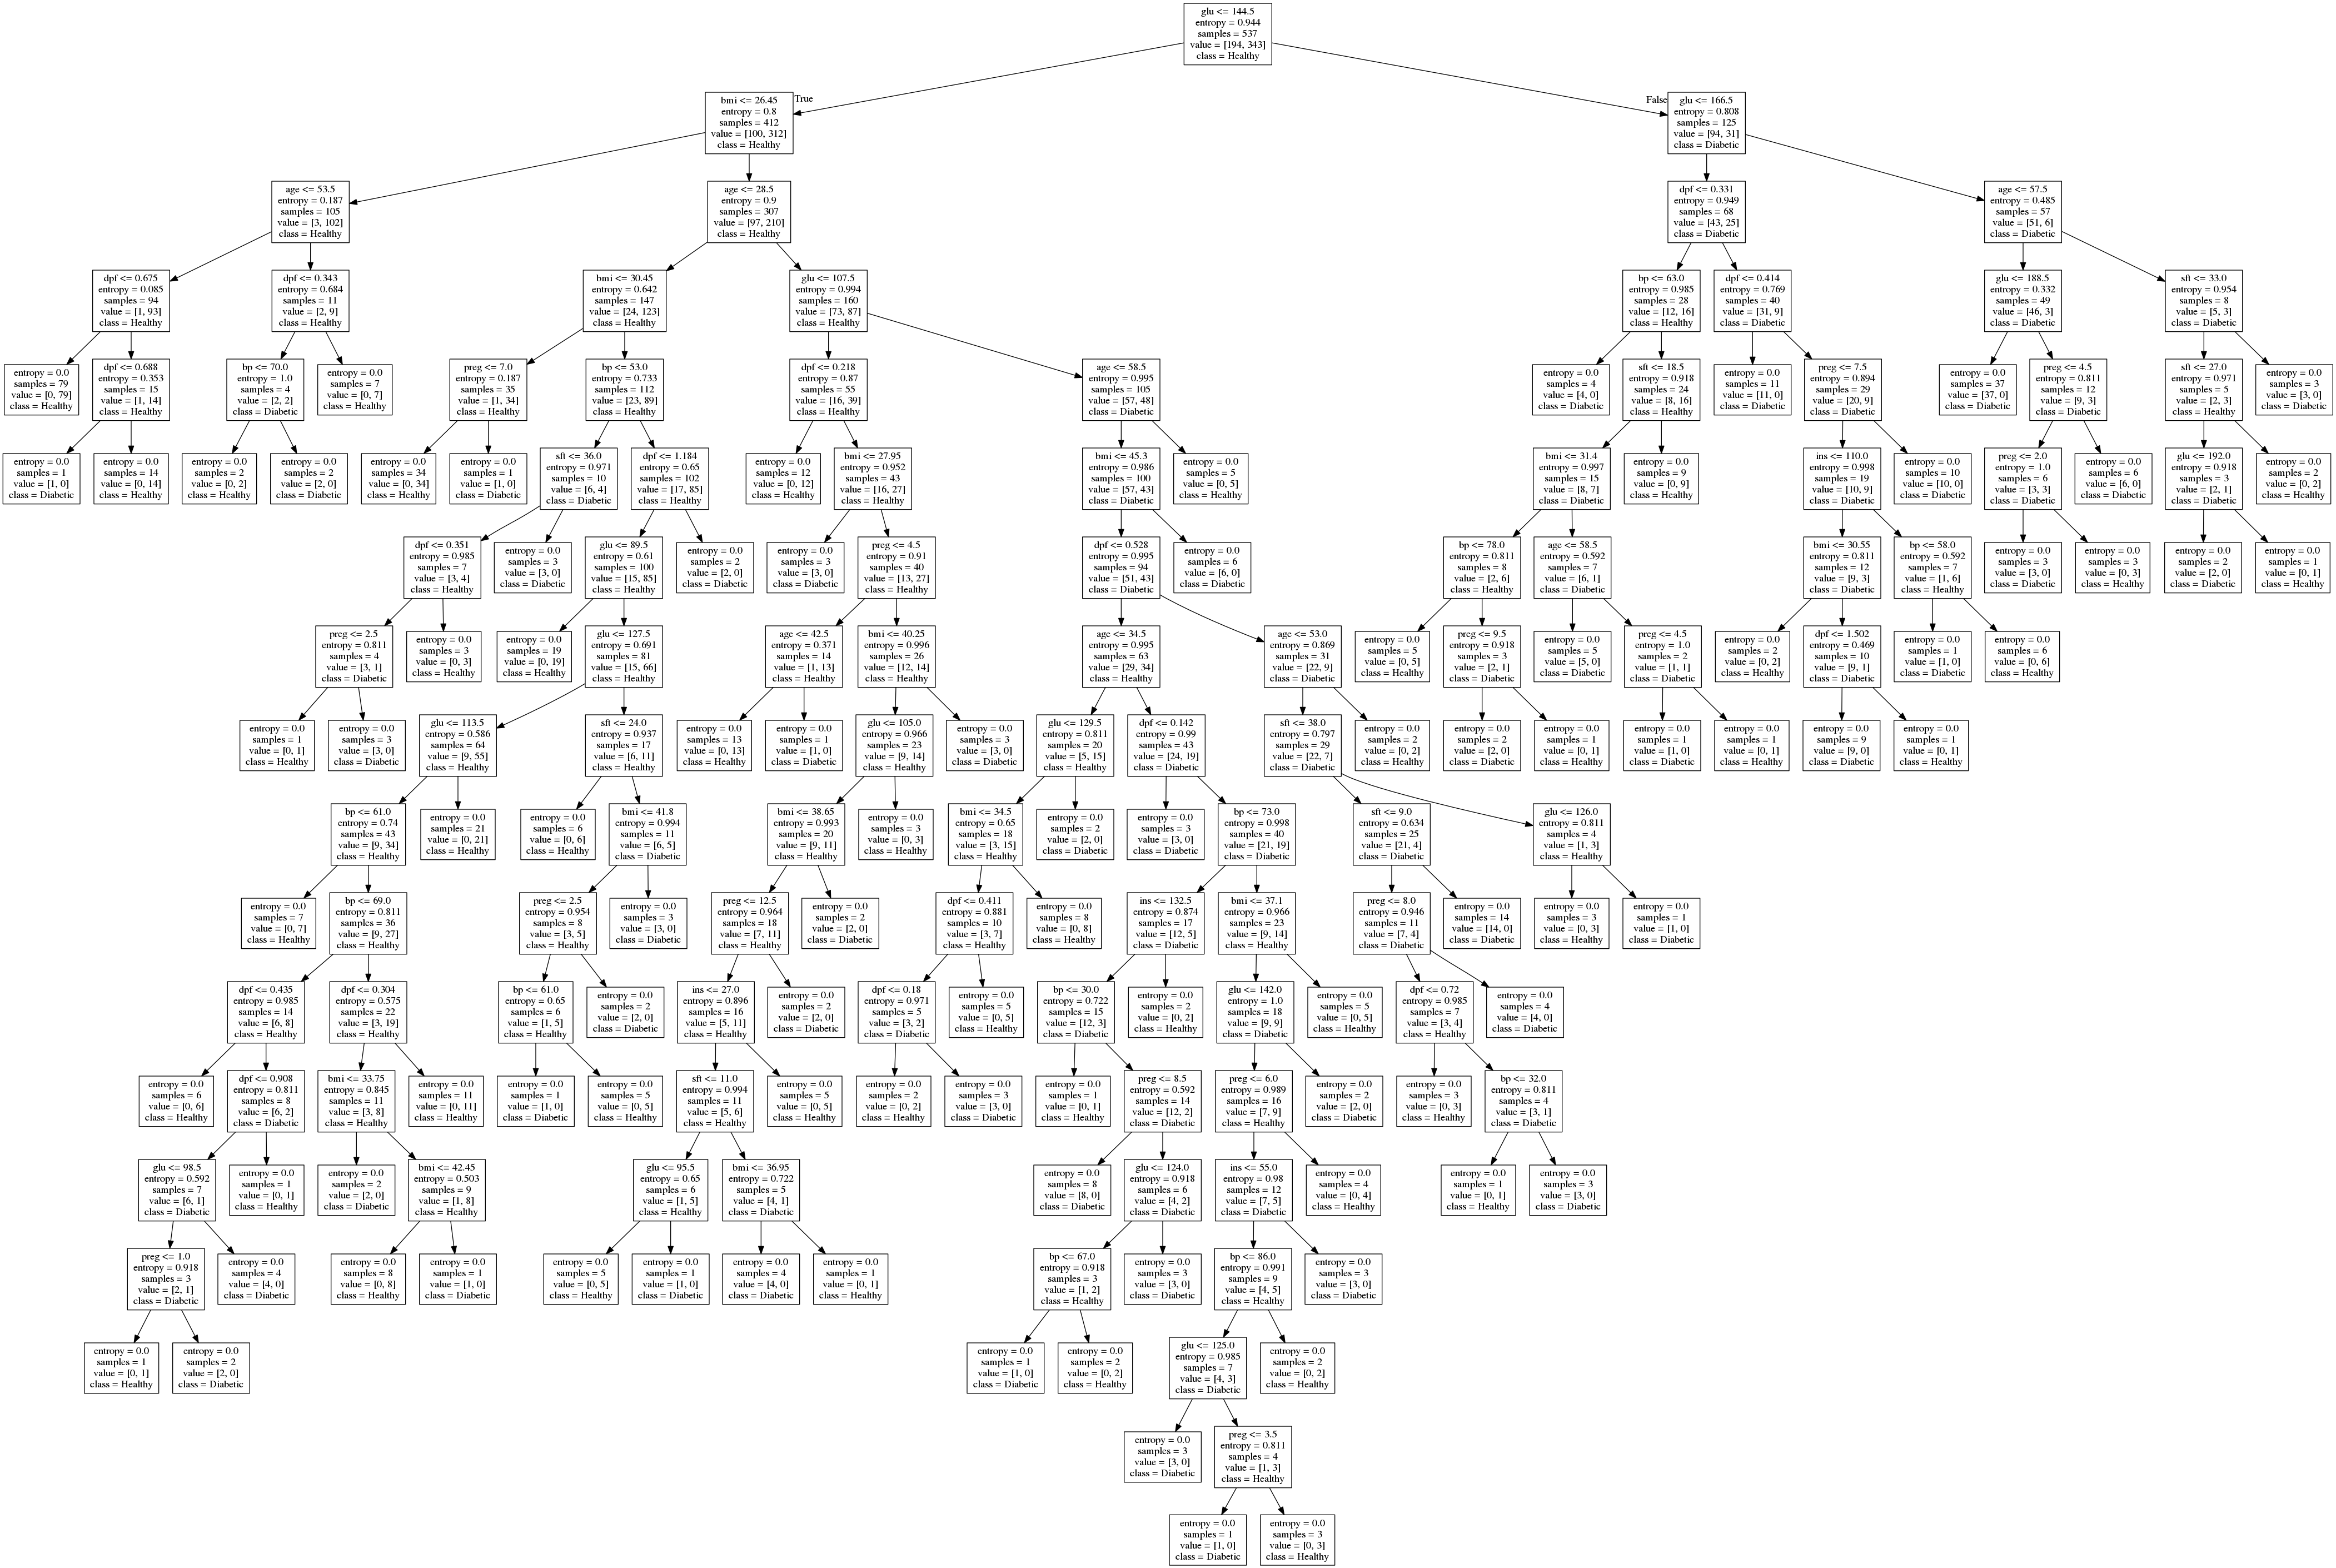

In [181]:
system("dot -Tpng diabetes_tree.dot -o diabetic_tree.png")   # This command is to the OS
Image("diabetic_tree.png")        # use the image command to read the .png file and print on screen